## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [1]:
# The usual loading of modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
from sklearn import cluster
from scipy import misc
from numpy import zeros

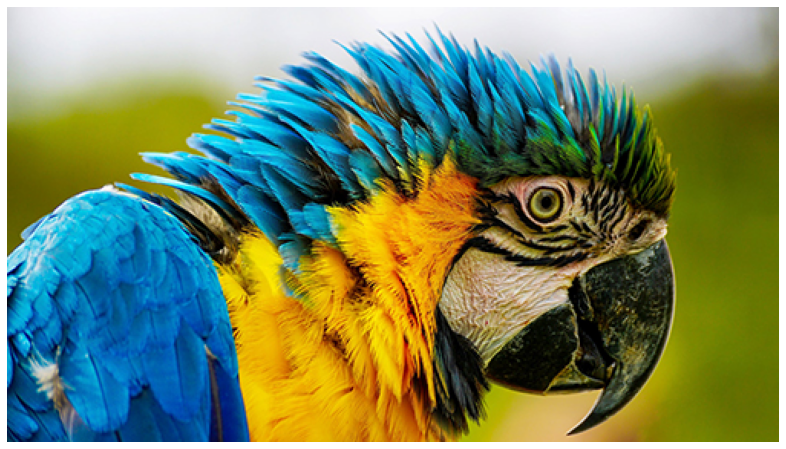

In [2]:
# Load an image.
imagex = image.imread("parrot_small.jpeg") # You may want to test with a smaller image, it will be faster
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [3]:
import numpy as np
import random 

print("Starting kMean implementation.")
cluster_count = 5 # How many clusters we want
clusters = np.zeros((cluster_count, 3))
# get random selection of clusters
for i in range (0, cluster_count):
    clusters[i] = np.array(random.choice(image_2d))

while True:
    # set all working variables back to defaults so nothing from previous loops messes up
    clusterLabels = np.zeros(x*y)
    clusterSubtractions = np.zeros(cluster_count)
    numOfPointsInCentroid = np.zeros(cluster_count)
    dataPointTotals = np.zeros(cluster_count)
    newClusters = np.zeros((cluster_count, 3))
    totalR = np.zeros(cluster_count)
    totalG = np.zeros(cluster_count)
    totalB = np.zeros(cluster_count)
    # LABEL DATAPOINTS WITH CLOSEST CENTROID
    for i in range (0, x*y):
        for j in range (0, cluster_count):
            clusterR, clusterG, clusterB = clusters[j]
            imagePixelR, imagePixelG, imagePixelB = image_2d[i]
            clusterSubtractions[j] = ((clusterR - imagePixelR) ** 2) + ((clusterG - imagePixelG) ** 2) + ((clusterB - imagePixelB) ** 2)
        # gets index of the closest centroid
        # get indexOf function took from https://stackoverflow.com/questions/18079029/index-of-element-in-numpy-array
        centroidIndex = int(list(clusterSubtractions).index(np.amin(clusterSubtractions)))
        clusterLabels[i] = centroidIndex
        # add one to the number of points assigned to that centroid
        numOfPointsInCentroid[centroidIndex] += 1
        # find total of all data points assigned to each centroid
        totalR[centroidIndex] += imagePixelR
        totalG[centroidIndex] += imagePixelG
        totalB[centroidIndex] += imagePixelB
        
    # FIND NEW CENTROID LOCATION - sum all values and divide by total number of values
    for i in range (0, cluster_count):
        newClusters[i, 0] =  int(totalR[i] / numOfPointsInCentroid[i])
        newClusters[i, 1] =  int(totalG[i] / numOfPointsInCentroid[i])
        newClusters[i, 2] =  int(totalB[i] / numOfPointsInCentroid[i])
    # if stable then break out of while loop
    if np.array_equal(newClusters, clusters):
        break 
    else:
        clusters = newClusters

cluster_labels = clusterLabels
print("Finished kMean calculation.")

Starting kMean implementation.
Finished kMean calculation.


In [4]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

[  2. 109. 175.   0.]
[11. 13.  5.  1.]
[103. 111.   2.   2.]
[176. 172. 119.   3.]
[  7. 172. 215.   4.]
[228. 229. 235.   5.]
[160. 136.   5.   6.]
[234. 177.   4.   7.]
[  3.  70. 114.   8.]
[55. 56. 32.  9.]


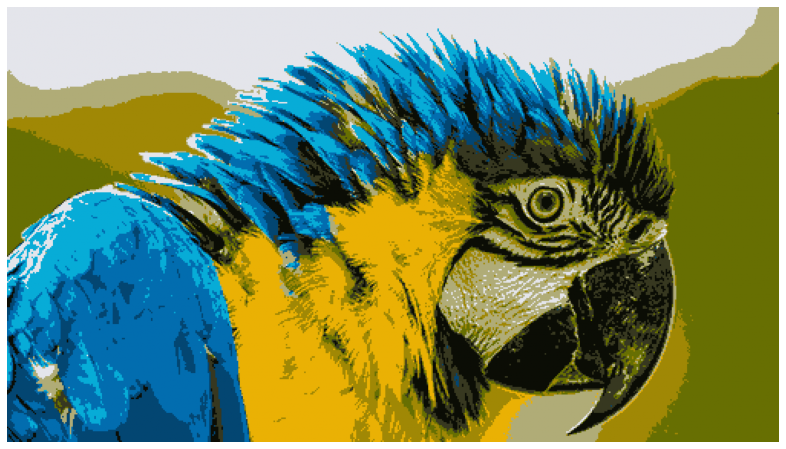

In [5]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')